Machine learning process: <br>
    1. Prepare data <br>
        Import <br>
        Explore <br>
        Split <br>
    2. Build model <br>
        Baseline <br>
        Iterate <br>
        Evaluate <br>
    3. Communicate results

In [31]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

A function to wrange all the data files we'll be using. <br>
We focus on houses that are: <br>
    apartment buildings <br>
    in the state Capital Federa <br>
    cost less than or equal to $400,000

In [32]:
def wrangle(filepath):
    # Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    # subset data
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    mask_apt = df['property_type'] == 'apartment'
    mask_price = df['price_aprox_usd'] < 400_000
    df = df[mask_ba & mask_apt & mask_price]
 
    return df

In [35]:
df = wrangle('buenos-aires-real-estate-1.xlsx')

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

In [ ]:
The data has the following columns:

In [18]:
for column in df.columns:
    print(column, end=', ')

Unnamed: 0, operation, property_type, place_with_parent_names, lat-lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, 

A histogram of prices of these properties against their areas:

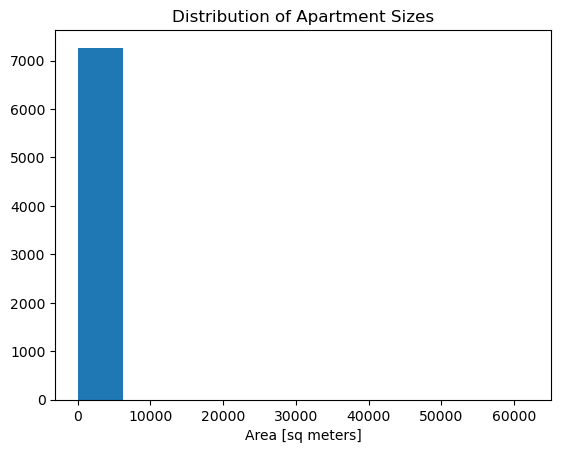

In [20]:
plt.hist(df['surface_covered_in_m2'])
plt.xlabel('Area [sq meters]')
plt.title('Distribution of Apartment Sizes');

The histogram reveals that there are outliers in the dataset since most of the properties are under 5,000 sq meters yet the x-axis goes up to 60,000 sq meters. <br>
<br>
This sort of outliers will make the linear regression model we are about to create inaccurate. Therefore, we must remove these values. This immense variability in the data is made evident by the summary statistics below:

In [21]:
df.describe()['surface_covered_in_m2']

count     7268.000000
mean       140.324436
std        764.092931
min          0.000000
25%         46.000000
50%         76.500000
75%        160.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

We could handle this by removing the, say, bottom 10% and top 10% of observations with respect to house area.

In [24]:
low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])

In [27]:
mask_area = df['surface_covered_in_m2'].between(low, high)

Redefining the wrangle function

In [34]:
def wrangle(filepath):
    # Read CSV file into DataFrame
    df = pd.read_csv(filepath)
    
    # subset data to state Capital Federa
    mask_ba = df['place_with_parent_names'].str.contains('Capital Federal')
    
    # subset to apartments
    mask_apt = df['property_type'] == 'apartment'
    
    # subset to price under $400,000
    mask_price = df['price_aprox_usd'] < 400_000
    df = df[mask_ba & mask_apt & mask_price]
    
    # remove area outliers
    low, high = df['surface_covered_in_m2'].quantile([0.1, 0.9])
    mask_area = df['surface_covered_in_m2'].between(low, high)
    df = df[mask_area]
 
    return df